<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module10_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd   
from random import sample

from sklearn.preprocessing import MinMaxScaler # For rescaling metrics to fit 0 to 1 range
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean

##Prep dataset

In [18]:
!git clone https://github.com/danielbauer1979/ML_656.git

Cloning into 'ML_656'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (110/110), done.
remote: Total 111 (delta 50), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (111/111), 21.71 MiB | 3.51 MiB/s, done.
Resolving deltas: 100% (50/50), done.


In [42]:
health = pd.read_csv('ML_656/countyHealthRR.csv')

In [43]:
health = health.drop(columns=['FIPS','State','County','Perc.Fair.Poor.Health','Perc.Smokers','Perc.Excessive.Drinking','MV.Mortality.Rate','Pr.Care.Physician.Ratio','Perc.No.Soc.Emo.Support'])

In [44]:
health = health.dropna()

In [45]:
health.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2387 entries, 0 to 3140
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   YPLL.Rate                  2387 non-null   float64
 1   Physically.Unhealthy.Days  2387 non-null   float64
 2   Mentally.Unhealthy.Days    2387 non-null   float64
 3   Perc.Low.Birth.Weight      2387 non-null   float64
 4   Perc.Obese                 2387 non-null   int64  
 5   Perc.Physically.Inactive   2387 non-null   int64  
 6   Chlamydia.Rate             2387 non-null   float64
 7   Teen.Birth.Rate            2387 non-null   float64
 8   Perc.Uninsured             2387 non-null   float64
 9   Dentist.Ratio              2387 non-null   float64
 10  Prev.Hosp.Stay.Rate        2387 non-null   float64
 11  Perc.Diabetic.Screening    2387 non-null   float64
 12  Perc.Mammography           2387 non-null   float64
 13  Perc.High.School.Grad      2387 non-null   float

In [49]:
#col_types = health.columns.to_series().groupby(health.dtypes).groups
#numerics = list(health.select_dtypes(include=['int64','float64']).columns)
#factors = list(health.select_dtypes(include=['object']).columns)

In [48]:
#health_numcols = health[numerics]
#health_faccols = health[factors]
#dummies = pd.get_dummies(health_faccols)
#scaler = MinMaxScaler()
#scaler.fit(health_numcols)
#health_numcols_sc_0 = scaler.transform(health_numcols)
#health_numcols_sc = pd.DataFrame(data=health_numcols_sc_0, columns = health_numcols.columns, index = dummies.index)

In [50]:
#health_sc = pd.concat([health_numcols_sc, dummies], axis = 1)
scaler = MinMaxScaler()
scaler.fit(health)
health_sc_0 = scaler.transform(health)
health_sc = pd.DataFrame(data=health_sc_0, columns = health.columns, index = dummies.index)
health_sc.head()

,YPLL.Rate,Physically.Unhealthy.Days,Mentally.Unhealthy.Days,Perc.Low.Birth.Weight,Perc.Obese,Perc.Physically.Inactive,Chlamydia.Rate,Teen.Birth.Rate,Perc.Uninsured,Dentist.Ratio,Prev.Hosp.Stay.Rate,Perc.Diabetic.Screening,Perc.Mammography,Perc.High.School.Grad,Perc.Some.College,Perc.Unemployed,Perc.Children.in.Poverty,Perc.Single.Parent.HH,Violent.Crime.Rate,Avg.Daily.Particulates,Perc.pop.in.viol,Rec.Facility.Rate,Perc.Limited.Access,Perc.Fast.Foods
0,0.319421,0.527778,0.538462,0.425532,0.588235,0.647059,0.161693,0.336207,0.272727,0.326869,0.207317,0.826087,0.675439,0.726027,0.464286,0.241259,0.293103,0.309859,0.150981,0.821429,0.00,0.116987,0.227273,0.483871
1,0.283746,0.277778,0.461538,0.382979,0.352941,0.441176,0.136303,0.379310,0.424242,0.153460,0.146341,0.768116,0.700000,0.643836,0.578869,0.244755,0.293103,0.338028,0.108203,0.642857,0.08,0.139423,0.113636,0.301075
2,0.383117,0.513889,0.507692,0.631206,0.676471,0.705882,0.287305,0.603448,0.424242,0.267023,0.361789,0.840580,0.610526,0.465753,0.281250,0.360140,0.620690,0.746479,0.075491,0.678571,0.08,0.059295,0.250000,0.526882
3,0.505916,0.513889,0.692308,0.602837,0.588235,0.794118,0.145657,0.379310,0.393939,0.447788,0.272358,0.826087,0.477193,0.630137,0.285714,0.307692,0.465517,0.478873,0.123805,0.869048,0.00,0.070513,0.045455,0.408602
4,0.327074,0.541667,0.492308,0.297872,0.529412,0.764706,0.050334,0.387931,0.424242,0.474646,0.304878,0.811594,0.631579,0.739726,0.299107,0.251748,0.310345,0.309859,0.051334,0.785714,0.07,0.083333,0.022727,0.526882


K-Means clustering

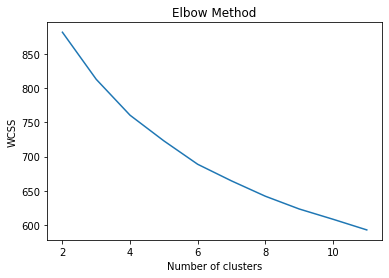

In [54]:
wcss = []
for i in range(2, 12):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=1000, n_init=10, random_state=0)
    kmeans.fit(health_sc)
    wcss.append(kmeans.inertia_)
plt.plot(range(2, 12), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=1000, n_init=10, random_state=0)
kmeans.fit(health_sc)
kmeans.cluster_centers_

array([[0.15711096, 0.22839241, 0.31038396, 0.23463864, 0.39784078,
        0.38386641, 0.09226984, 0.1722955 , 0.23234056, 0.15478683,
        0.15385795, 0.85415268, 0.69080377, 0.82083696, 0.64773493,
        0.19687774, 0.19347016, 0.28545889, 0.08825893, 0.46434697,
        0.06269297, 0.19149679, 0.12634492, 0.36590494],
       [0.26398566, 0.33692286, 0.42289501, 0.33168008, 0.48658585,
        0.51242051, 0.13421492, 0.30469478, 0.34433866, 0.21060422,
        0.21460943, 0.82997944, 0.62845543, 0.76929841, 0.4804411 ,
        0.28262616, 0.32103332, 0.38094785, 0.13983035, 0.73898005,
        0.03815878, 0.13644263, 0.12703471, 0.43571999],
       [0.44755985, 0.40337457, 0.4468149 , 0.56513187, 0.62672335,
        0.65107996, 0.32771785, 0.54640356, 0.49360795, 0.2884822 ,
        0.29449314, 0.76064312, 0.53676672, 0.61997003, 0.32789249,
        0.35642483, 0.56452047, 0.60926496, 0.29283703, 0.63578869,
        0.04519531, 0.086094  , 0.20703125, 0.50386425],
       [0.279

PCA

In [57]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(health_sc)
principalComponents

array([[ 0.14605474, -0.32193259],
       [-0.14095189, -0.01389763],
       [ 0.68108276, -0.01940338],
       ...,
       [-0.2619038 ,  0.28229786],
       [-0.4163065 ,  0.54073209],
       [-0.23821772,  0.37793634]])